<h1><centre><b>Hackathon Brazil housing</b></centre></h1>

<b>Objective:</b><br>
*) As work from home has become new normal for workers , Many workers are planning to relocate to <br>
different cities to live and work remotely.<br>
*) Castro Brazila Inc, is a real estate management company help workers to choose city to relocate from 
Sao Paulo and Rio de Janeiro to other cities of Brazil where Rent cost is low.<br>
*) Castro Brazila Inc suggests city based on worker’s requirements.


In [77]:
#importing required library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')

#to read data into dataframe from a csv file
data=pd.read_csv(r"DS1_C5_S3_BazilHousing_Data_Hackathon.csv")
data

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10687,Porto Alegre,63,2,1,1,5,not acept,furnished,402,1478,24,22,1926
10688,São Paulo,285,4,4,4,17,acept,not furnished,3100,15000,973,191,19260
10689,Rio de Janeiro,70,3,3,0,8,not acept,furnished,980,6000,332,78,7390
10690,Rio de Janeiro,120,2,2,2,8,acept,furnished,1585,12000,279,155,14020


#to check null values

In [4]:
data.isnull().sum()

city                   0
area                   0
rooms                  0
bathroom               0
parking spaces         0
floor                  0
animal                 0
furniture              0
hoa (R$)               0
rent amount (R$)       0
property tax (R$)      0
fire insurance (R$)    0
total (R$)             0
dtype: int64

In [86]:
#to get all information of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   city                 10692 non-null  object
 1   area                 10692 non-null  int64 
 2   rooms                10692 non-null  object
 3   bathroom             10692 non-null  object
 4   parking spaces       10692 non-null  object
 5   floor                10692 non-null  int64 
 6   animal               10692 non-null  object
 7   furniture            10692 non-null  object
 8   hoa (R$)             10692 non-null  int64 
 9   rent amount (R$)     10692 non-null  int64 
 10  property tax (R$)    10692 non-null  int64 
 11  fire insurance (R$)  10692 non-null  int64 
 12  total (R$)           10692 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 1.1+ MB


In [5]:
#to find all columns of data
data.columns

Index(['city', 'area', 'rooms', 'bathroom', 'parking spaces', 'floor',
       'animal', 'furniture', 'hoa (R$)', 'rent amount (R$)',
       'property tax (R$)', 'fire insurance (R$)', 'total (R$)'],
      dtype='object')

In [ ]:
#To replace 5 & more parking spaces with More Spaces 
mapping={5:'More Spaces',6:'More Spaces',7:'More Spaces',8:'More Spaces',10:'More Spaces',
         12:'More Spaces',0:0,1:1,2:2,3:3,4:4}
data['parking spaces']=data['parking spaces'].map(mapping)

In [ ]:
#to replace 5 & more rooms with More Rooms
mapping1={1:1,2:2,3:3,4:4,5:'More Rooms',6:'More Rooms',8:'More Rooms',9:'More Rooms',10:'More Rooms',
        13:'More Rooms',7:'More Rooms'}
data['rooms']=data['rooms'].map(mapping1)

In [ ]:
#to replace 5 & more bathrooms with More bathrooms
mapping2={1:1,2:2,3:3,4:4,5:'More Bathrooms',6:'More Bathrooms',7:'More Bathrooms',8:'More Bathrooms'
         ,9:'More Bathrooms',10:'More Bathrooms'}
data['bathroom']=data['bathroom'].map(mapping2)

# columns of categorial data type

In [83]:
#using fun_cat function we find Columns that are Categorical data type.
cat=[]
for col in data.columns:
    if data[col].nunique()<=38:
        cat.append(col)

print("Columns that are Categorical data type are:",cat)

#cat list is created,having Categorical data type

Columns that are Categorical data type are: ['city', 'rooms', 'bathroom', 'parking spaces', 'floor', 'animal', 'furniture']


In [84]:
# using fun_con function we find Columns that are Numeric data type.
con=[]
con1=data.drop(cat,axis=1) 
con.append(con1.columns)
con
#con list is created,having Numeric data type

[Index(['area', 'hoa (R$)', 'rent amount (R$)', 'property tax (R$)',
        'fire insurance (R$)', 'total (R$)'],
       dtype='object')]

In [87]:
#dataframe of cat
data_cat=data.loc[:,cat]

#dataframe of col
data_col=data.drop(cat,axis=1)

# To replace missing values of categorial columns with mode value

In [88]:
def fun_cate1(col):
    if data_cat[col].isnull().sum()>0:
        data_cat[col].fillna(data_cat[col].mode()[0],inplace=True)
    print(f"{col}:Number of category is {data_cat[col].unique()}")
    print(f"{col}:Missing Value is {data_cat[col].isnull().sum()}")
    print("\n")

In [89]:
for col in data_cat.columns:
    fun_cate1(col)

city:Number of category is ['São Paulo' 'Porto Alegre' 'Rio de Janeiro' 'Campinas' 'Belo Horizonte']
city:Missing Value is 0


rooms:Number of category is [2 4 1 3 'More Rooms']
rooms:Missing Value is 0


bathroom:Number of category is [1 4 3 2 'More Bathrooms']
bathroom:Missing Value is 0


parking spaces:Number of category is [1 0 'More Spaces' 4 2 3]
parking spaces:Missing Value is 0


floor:Number of category is [  7  20   6   2   1   0   4   3  10  11  24   9   8  17  18   5  13  15
  16  14  26  12  21  19  22  27  23  35  25  46  28  29 301  51  32]
floor:Missing Value is 0


animal:Number of category is ['acept' 'not acept']
animal:Missing Value is 0


furniture:Number of category is ['furnished' 'not furnished']
furniture:Missing Value is 0




In [90]:
#new data
data

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10687,Porto Alegre,63,2,1,1,5,not acept,furnished,402,1478,24,22,1926
10688,São Paulo,285,4,4,4,17,acept,not furnished,3100,15000,973,191,19260
10689,Rio de Janeiro,70,3,3,0,8,not acept,furnished,980,6000,332,78,7390
10690,Rio de Janeiro,120,2,2,2,8,acept,furnished,1585,12000,279,155,14020


# To replace missing values of Continues columns with mean value

In [91]:
def fun_num(i):
    if data_col[i].isnull().sum()>0:
        data_col[i].fillna(data_col[i].mean(),inplace=True)
    
    print(f"{i}:Missing Value is {data_col[i].isnull().sum()}")
    

In [92]:
for i in data_col.columns:
    fun_num(i)
    

area:Missing Value is 0
hoa (R$):Missing Value is 0
rent amount (R$):Missing Value is 0
property tax (R$):Missing Value is 0
fire insurance (R$):Missing Value is 0
total (R$):Missing Value is 0


# To perform Univariate analysis categorial columns

**How many Vacent flats in each City?**

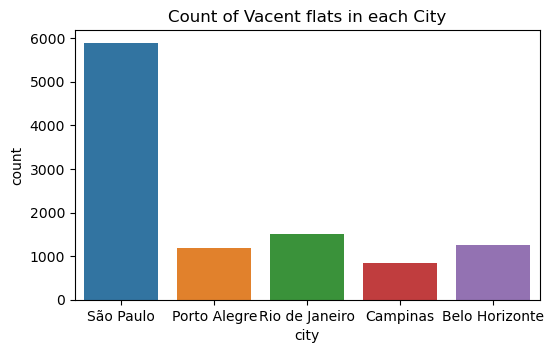

In [13]:
plt.figure(figsize=(6,3.5))
sb.countplot(x=data['city']) 
plt.title('Count of Vacent flats in each City')
plt.show()


Observation:<br>
    5900 of vacant flats are in sao paulo 
    <br>Nearly 1000 homes in all other cities

**Count of Rooms**

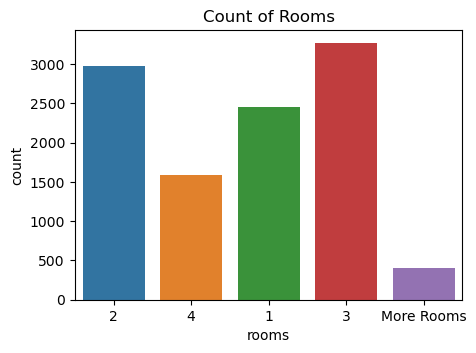

In [94]:
plt.figure(figsize=(5,3.5))
sb.countplot(x=data['rooms']) 
plt.title('Count of Rooms')
plt.show()


Observation:<br>
    there are 2400 1bhk room & 3000 3bhk rooms are available for rent

**Count of bathroom**

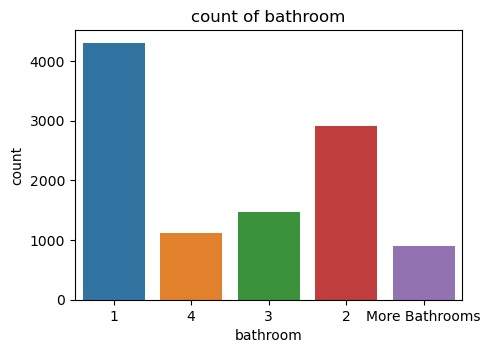

In [95]:
plt.figure(figsize=(5,3.5))

sb.countplot(x=data['bathroom']) 
plt.title('count of bathroom')
plt.show()

Observation:<br>
    4000+ flats have 1 bathroom 

**Count of parking spaces**

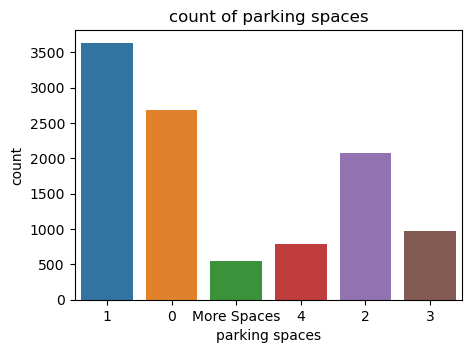

In [96]:
plt.figure(figsize=(5,3.5))

sb.countplot(x=data['parking spaces']) 
plt.title('count of parking spaces')
plt.show()


Observation:<br>
    3500 flats have 1 parking spaces

**Count of Flats that allow pets**

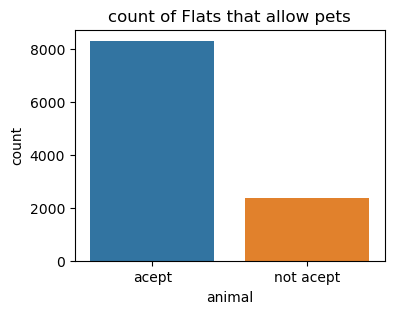

In [24]:
plt.figure(figsize=(4,3))
sb.countplot(x=data['animal']) 
plt.title('count of Flats that allow pets')
plt.show()

Observation:<br>
    Pets are accepted in 8000 & 2000 plus flats does not allow pets

**Count of Furnitured/Unfurnished Home**

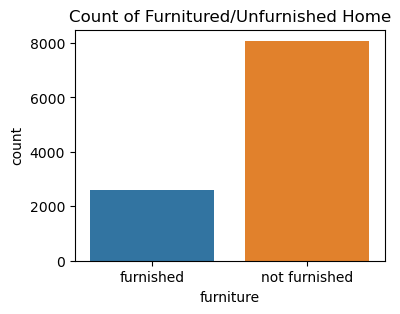

In [26]:
plt.figure(figsize=(4,3))
sb.countplot(x=data['furniture']) 
plt.title('Count of Furnitured/Unfurnished Home')
plt.show()

Observation:<br>
    2500 flats are furnished & 8000 flats are unfurnished

**Count of floors in Flats**

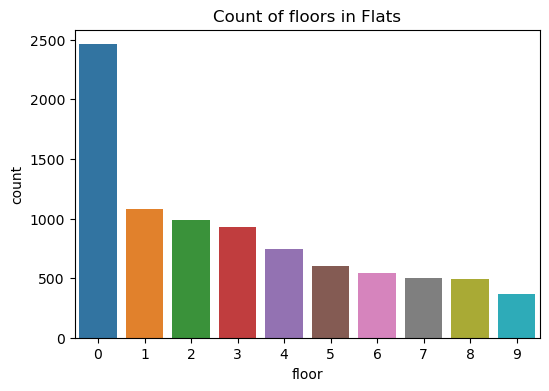

In [6]:
plt.figure(figsize=(6,4))
data1=data[data['floor']<10]
sb.countplot(x=data1['floor']) 
plt.title('Count of floors in Flats')
plt.show()

Observation:<br>
    2400 flats has 0 floor

# Univariate Analysis on Numerical data

**Histogram for area**

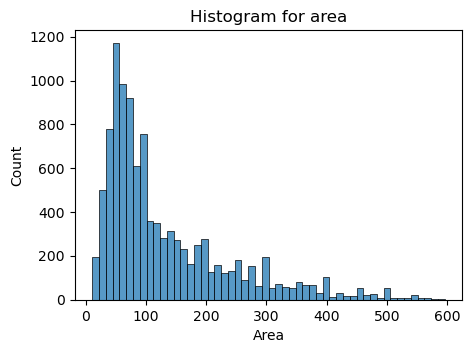

In [25]:
#histogram for area using subplots
plt.figure(figsize=(5,3.5))
data1=data[data['area']<600]
sb.histplot(x=data1['area'])
plt.xlabel('Area')
plt.ylabel('Count')

plt.title('Histogram for area')
plt.show()


Observation:<br>
    Many Flats has area between 0 to 250

**Box plot for hoa (R$)**

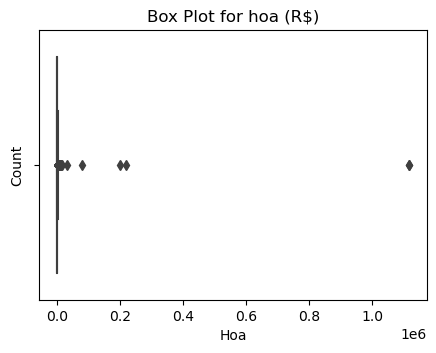

In [26]:
plt.figure(figsize=(5,3.5))
sb.boxplot(x=data['hoa (R$)'])
plt.title('Box Plot for hoa (R$)')
plt.xlabel('Hoa')
plt.ylabel('Count')
plt.show()

Observation:<br>
    House owner assoiation tax (R$) data has is between 0 to 0.1

**Histogram for rent amount**

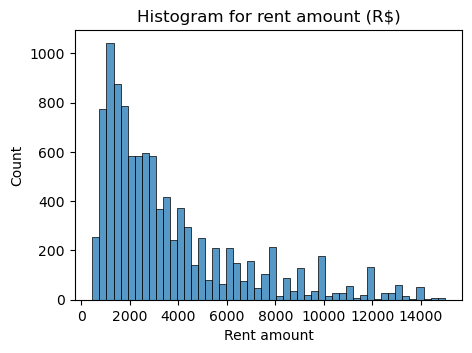

In [27]:
plt.figure(figsize=(5,3.5))
data1=data[data['rent amount (R$)']<15000]
sb.histplot(x=data1['rent amount (R$)'])
plt.title('Histogram for rent amount (R$)')
plt.xlabel('Rent amount')
plt.ylabel('Count')
plt.show()


Observation:<br>
    1000 homes have rent 1500-2000(R$)

**Histogram for property tax**

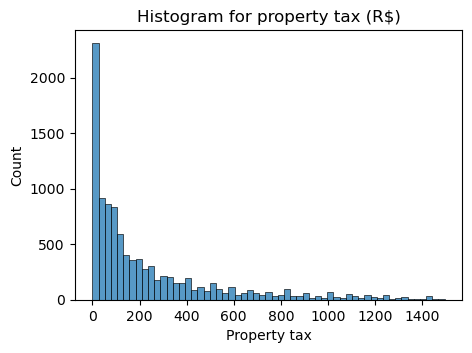

In [28]:
plt.figure(figsize=(5,3.5))
data1=data[data['property tax (R$)']<1500]
sb.histplot(x=data1['property tax (R$)'])
plt.title('Histogram for property tax (R$)')
plt.xlabel('Property tax')
plt.ylabel('Count')
plt.show()


Observation:<br>
    2000 plus flats have property tax (R$) 0

**Histogram for fire insurance**

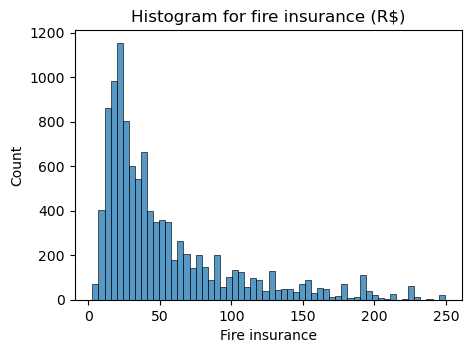

In [29]:
plt.figure(figsize=(5,3.5))
data1=data[data['fire insurance (R$)']<250]
sb.histplot(x=data1['fire insurance (R$)'])
plt.title('Histogram for fire insurance (R$)')
plt.xlabel('Fire insurance')
plt.ylabel('Count')
plt.show()


Observation:<br>
    1000 plus flats have file insurance amount in range 25 to 30

**Histogram for fire insurance**

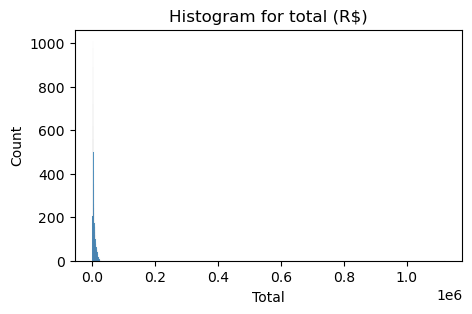

In [31]:
plt.figure(figsize=(5,3))
sb.histplot(x=data['total (R$)'])
plt.title('Histogram for total (R$)')
plt.xlabel('Total')
plt.ylabel('Count')
plt.show()

Observation:<br>
    total data has outliers 

**Does number of Bathroom impact Rent Amount**

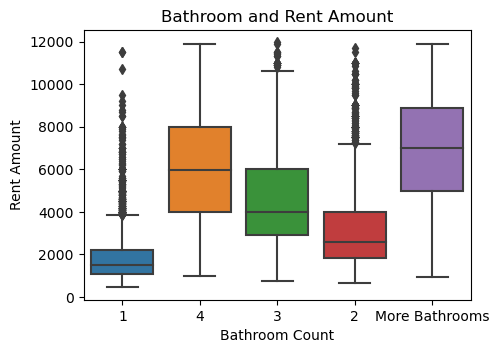

In [98]:
plt.figure(figsize=(5,3.5))
data1=data[(data['rent amount (R$)']<12000)]
sb.boxplot(x=data1['bathroom'],y=data1['rent amount (R$)'])
plt.title('Bathroom and Rent Amount')
plt.xlabel('Bathroom Count')
plt.ylabel('Rent Amount')
plt.show()

Observation:<br>
    Rent Amount of flats Increase with increase in number of bathroom

**Does number of Rooms impact Rent Amount?**

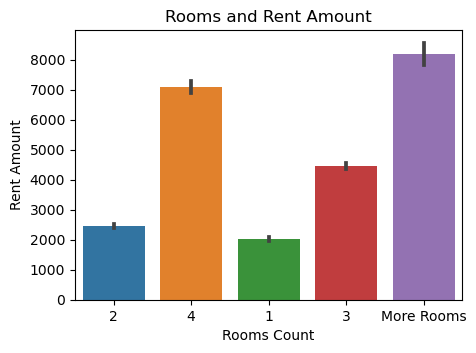

In [99]:
plt.figure(figsize=(5,3.5))
data1=data[(data['rent amount (R$)']<20000)]
sb.barplot(x=data1['rooms'],y=data1['rent amount (R$)'])
plt.title('Rooms and Rent Amount')
plt.xlabel('Rooms Count')
plt.ylabel('Rent Amount')
plt.show()

Observation:<br>
    Rent Amount of flats Increase with increase in number of rooms

**Which city has more furnitured homes?**

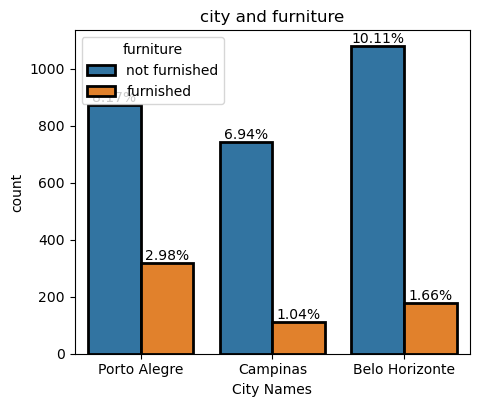

In [16]:
#show no on bar

fig, ax = plt.subplots(figsize= (5.1,4.2))
data1=data[data['city'].isin(['Porto Alegre','Campinas','Belo Horizonte'])]
ax = sb.countplot(x=data1['city'],hue=data1['furniture'],edgecolor='black',linewidth=2)
for bar in ax.patches:                                              # ax.patches returns the rectange object from matplotlib
    percentage =f"{round(bar.get_height() /data.shape[0]*100, 2)}%"          # first it calculate the bar height and then dividing by the number of rows in data(to calculate percentage) 
                                                                    # and multiply with 100 to get the percentage and rounding of by 2 numbers.  
    x = bar.get_x() + bar.get_width() /2                            # get_x: returns the left corrdinate of the rectange, get_width: returns width of rectagle
    y = bar.get_height()                                            # get_height: returns height of rectange
    ax.annotate(percentage, (x, y), va = "bottom", ha ="center" )   # va bottom: means percentage would be above the bar head. 
                                                                    # annotate: used to annotate over objects, here objects are the bars
plt.title('city and furniture')
plt.xlabel('City Names')
plt.show()


Observation:<br>
    Porto Alegra has more furnished homes

**Which city has more pets accepted homes?**

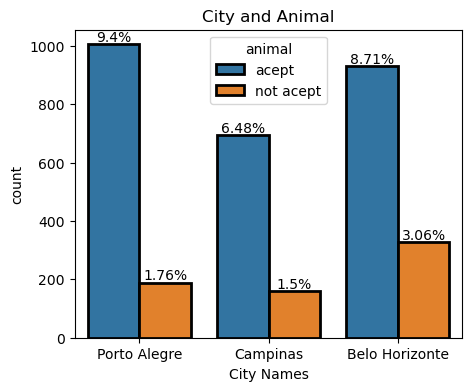

In [17]:
#show no on bar
fig, ax = plt.subplots(figsize= (5,4))
data1=data[data['city'].isin(['Porto Alegre','Campinas','Belo Horizonte'])]
ax = sb.countplot(x=data1['city'],hue=data1['animal'],edgecolor='black',linewidth=2)
for bar in ax.patches:                                              # ax.patches returns the rectange object from matplotlib
    percentage =f"{round(bar.get_height() /data.shape[0]*100, 2)}%"          # first it calculate the bar height and then dividing by the number of rows in data(to calculate percentage) 
                                                                    # and multiply with 100 to get the percentage and rounding of by 2 numbers.  
    x = bar.get_x() + bar.get_width() /2                            # get_x: returns the left corrdinate of the rectange, get_width: returns width of rectagle
    y = bar.get_height()                                            # get_height: returns height of rectange
    ax.annotate(percentage, (x, y), va = "bottom", ha ="center" )   # va bottom: means percentage would be above the bar head. 
                                                                    # annotate: used to annotate over objects, here objects are the bars
plt.title('City and Animal')
plt.xlabel('City Names')
plt.show()


Observation:<br>
    Pets are allowed more in Porto Alegra

**what Percentage of bathrooms(count) available in all city?**

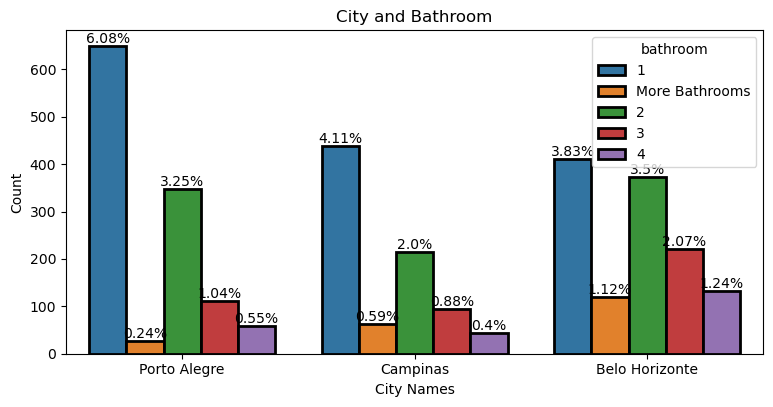

In [102]:
data1=data[(data['city'].isin(['Porto Alegre','Campinas','Belo Horizonte']))]

#show no on bar
fig, ax = plt.subplots(figsize= (9,4.2))
ax = sb.countplot(x=data1['city'],hue=data1['bathroom'],edgecolor='black',linewidth=2)
for bar in ax.patches:                                              # ax.patches returns the rectange object from matplotlib
    percentage =f"{round(bar.get_height() /data.shape[0]*100, 2)}%"          # first it calculate the bar height and then dividing by the number of rows in data(to calculate percentage) 
                                                                    # and multiply with 100 to get the percentage and rounding of by 2 numbers.  
    x = bar.get_x() + bar.get_width() /2                            # get_x: returns the left corrdinate of the rectange, get_width: returns width of rectagle
    y = bar.get_height()                                            # get_height: returns height of rectange
    ax.annotate(percentage, (x, y), va = "bottom" , ha ="center" )   # va bottom: means percentage would be above the bar head. 
                                                                    # annotate: used to annotate over objects, here objects are the bars
plt.title('City and Bathroom')
plt.xlabel('City Names')
plt.ylabel('Count')
plt.show()

Observation:<br>
    1 bathrooms flats are more in all cities.

**Does rent amount impact property tax ?**

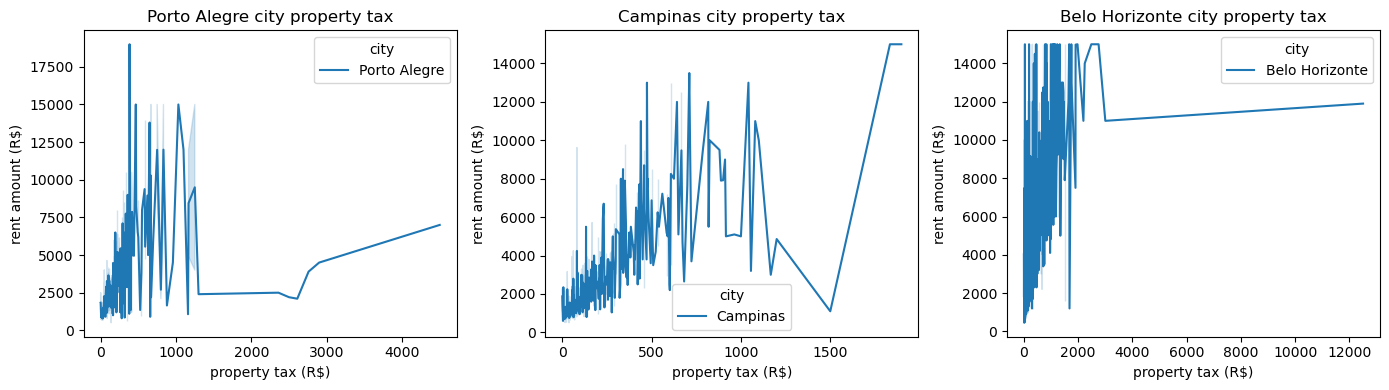

In [25]:
#Porto Alegre
fig,ax=plt.subplots(1,3,figsize=(14,4))
data1=data[data['city']=='Porto Alegre']
sb.lineplot(x=data1[data1['property tax (R$)']<20000]['property tax (R$)'],
            y=data1[data1['rent amount (R$)']<50000]['rent amount (R$)'],hue=data1['city'],ax=ax[0])
ax[0].set_title('Porto Alegre city property tax')

#Campinas
data11=data[data['city']=='Campinas']
sb.lineplot(x=data11[data11['property tax (R$)']<20000]['property tax (R$)'],
            y=data11[data11['rent amount (R$)']<50000]['rent amount (R$)'],hue=data11['city'],ax=ax[1])
ax[1].set_title('Campinas city property tax')

#Belo Horizonte
data12=data[data['city']=='Belo Horizonte']
sb.lineplot(x=data12[data12['property tax (R$)']<20000]['property tax (R$)'],
            y=data12[data12['rent amount (R$)']<50000]['rent amount (R$)'],hue=data12['city'],ax=ax[2])
ax[2].set_title('Belo Horizonte city property tax')

plt.tight_layout()


Observation:<br>
    Property tax is low in Belo Horizonte & Property tax remains same for all rent amount

**Does rent amount impact  totals?**

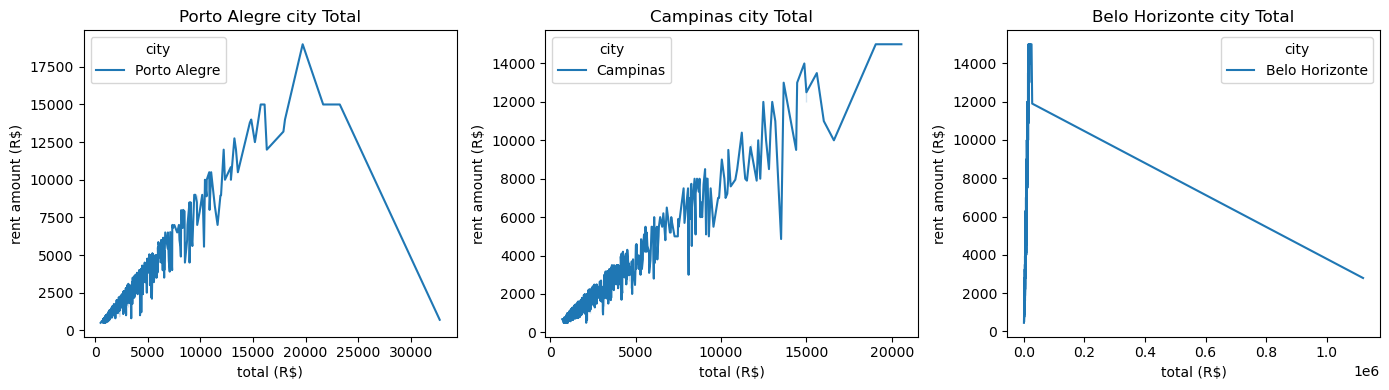

In [28]:
#Porto Alegre
fig,ax=plt.subplots(1,3,figsize=(14,4))
data1=data[data['city']=='Porto Alegre']
sb.lineplot(x=data1['total (R$)'],
            y=data1['rent amount (R$)'],hue=data1['city'],ax=ax[0])
ax[0].set_title('Porto Alegre city Total')

#Campinas
data11=data[data['city']=='Campinas']
sb.lineplot(x=data11['total (R$)'],
            y=data11['rent amount (R$)'],hue=data11['city'],ax=ax[1])
ax[1].set_title('Campinas city Total')

#Belo Horizonte
data12=data[data['city']=='Belo Horizonte']
sb.lineplot(x=data12['total (R$)'],
            y=data12['rent amount (R$)'],hue=data12['city'],ax=ax[2])
ax[2].set_title('Belo Horizonte city Total')

plt.tight_layout()

Observation:<br>
    City wise total,rent amount increases with increase in total.

**Does area of flat impact rent amount ?**

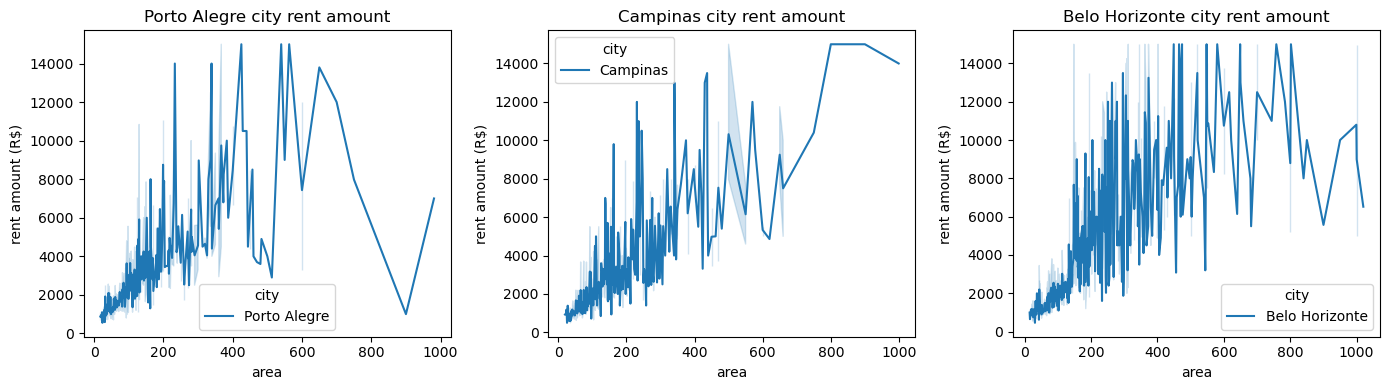

In [23]:
#Porto Alegre
fig,ax=plt.subplots(1,3,figsize=(14,4))
data1=data[data['city']=='Porto Alegre']
sb.lineplot(x=data1[data1['area']<1500]['area'],
y=data1[data1['rent amount (R$)']<18000]['rent amount (R$)'],hue=data1['city'],ax=ax[0])
ax[0].set_title('Porto Alegre city rent amount')

#Campinas
data11=data[data['city']=='Campinas']
sb.lineplot(x=data11[data11['area']<1500]['area'],
y=data11[data11['rent amount (R$)']<18000]['rent amount (R$)'],hue=data11['city'],ax=ax[1])
ax[1].set_title('Campinas city rent amount')

#Belo Horizonte
data12=data[data['city']=='Belo Horizonte']
sb.lineplot(x=data12[data12['area']<1500]['area'],
y=data12[data12['rent amount (R$)']<18000]['rent amount (R$)'],hue=data12['city'],ax=ax[2])
ax[2].set_title('Belo Horizonte city rent amount')

plt.tight_layout()


Observation:<br>
    Rent amount increases with increase in area of flat

**Which City has low rent amount for 1 bhk ,2 & 3 bhk flats?**

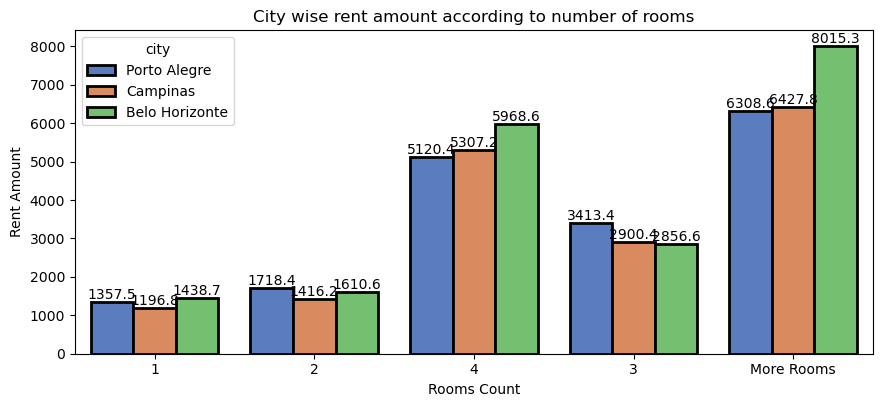

In [106]:
fig, ax = plt.subplots(figsize= (10.3,4.2))
data1=data[(data['city'].isin(['Porto Alegre','Campinas','Belo Horizonte']))]
ax = sb.barplot(x=data1['rooms'],y=data1['rent amount (R$)'],hue=data1['city'],data=data1,palette='muted',ci=False,edgecolor='black',linewidth=2)
for bar in ax.patches:                                             
    percentage =f"{round(bar.get_height(),1)}"                    
    x = bar.get_x() + bar.get_width() /2                           
    y = bar.get_height()                                            
    ax.annotate(percentage, (x, y), va = "bottom", ha ="center" ) 
plt.title('City wise rent amount according to number of rooms')
plt.xlabel('Rooms Count')
plt.ylabel('Rent Amount')
plt.show()


Observation:<br>
IN Campinas we can get 1bhk flat for low price<br>
In Campinas we get 2bhk flat for low price<br>
In Belo Horizonte we get 3bhk flat for low price

**What is rent amount of Furnished/Unfurnished Home acc to City ?**

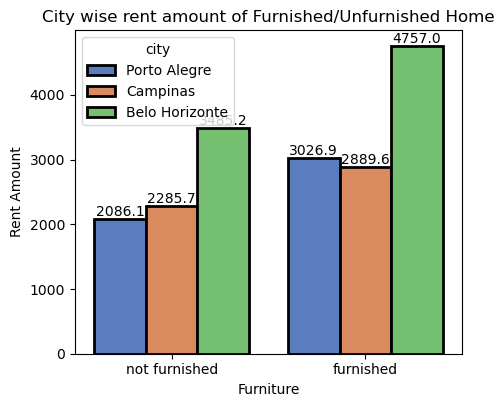

In [42]:
fig, ax = plt.subplots(figsize= (5,4.2))
data1=data[data['city'].isin(['Porto Alegre','Campinas','Belo Horizonte'])]
ax = sb.barplot(x=data1['furniture'],y=data1['rent amount (R$)'],hue=data1['city'],data=data1,palette='muted',ci=False,edgecolor='black',linewidth=2)
for bar in ax.patches:                                             
    percentage =f"{round(bar.get_height(),1)}"                    
    x = bar.get_x() + bar.get_width() /2                           
    y = bar.get_height()                                            
    ax.annotate(percentage, (x, y), va = "bottom", ha ="center" ) 
plt.title('City wise rent amount of Furnished/Unfurnished Home')
plt.xlabel('Furniture')
plt.ylabel('Rent Amount')
plt.show()


Observation:   
we can get furnished home below 2889 in Campinas , 4757 in Belo horizonte<br>
unfurnished home below 2285 in Campinas , 3485 in Belo horizonte

**what is rent amount according to number of parking spaces in each City ?**

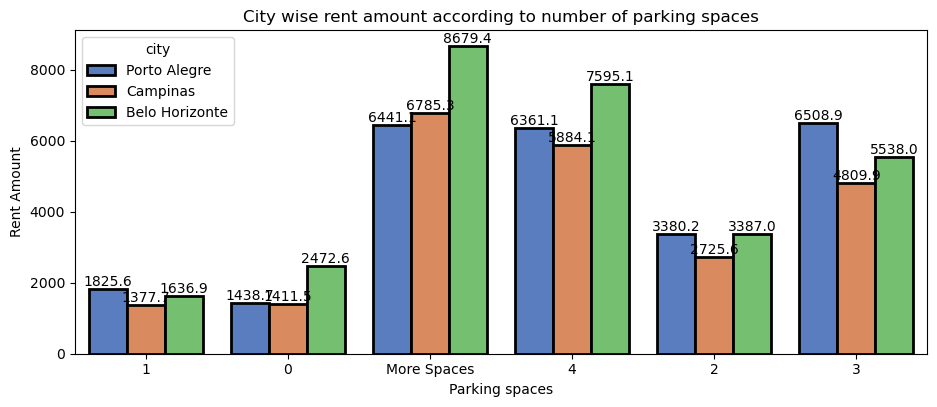

In [108]:
fig, ax = plt.subplots(figsize= (11,4.2))
data1=data[(data['city'].isin(['Porto Alegre','Campinas','Belo Horizonte']))]
ax = sb.barplot(x=data1['parking spaces'],y=data1['rent amount (R$)'],hue=data1['city'],data=data1,palette='muted',ci=False,edgecolor='black',linewidth=2)
for bar in ax.patches:                                             
    percentage =f"{round(bar.get_height(),1)}"                    
    x = bar.get_x() + bar.get_width() /2                           
    y = bar.get_height()                                            
    ax.annotate(percentage, (x, y), va = "bottom", ha ="center" ) 
plt.title('City wise rent amount according to number of parking spaces')
plt.xlabel('Parking spaces')
plt.ylabel('Rent Amount')
plt.show()


Observation:<br>
for 1 parking spaces rent amount is below 18500 & for 2 rent amount is below 3400 <br>
Rent amount is low for 0 & 1 parking spaces,3 to 5 parking spaces has almost same rent amount

**What is rent amount for animals accepted/not homes in each city?**

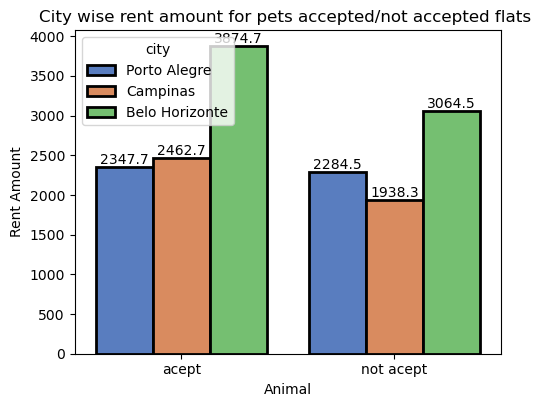

In [41]:
fig, ax = plt.subplots(figsize= (5.5,4.2))
data1=data[data['city'].isin(['Porto Alegre','Campinas','Belo Horizonte'])]
ax = sb.barplot(x=data1['animal'],y=data1['rent amount (R$)'],hue=data1['city'],data=data1,palette='muted',ci=False,edgecolor='black',linewidth=2)
for bar in ax.patches:                                             
    percentage =f"{round(bar.get_height(),1)}"                    
    x = bar.get_x() + bar.get_width() /2                           
    y = bar.get_height()                                            
    ax.annotate(percentage, (x, y), va = "bottom", ha ="center" ) 
plt.title('City wise rent amount for pets accepted/not accepted flats ')
plt.xlabel('Animal')
plt.ylabel('Rent Amount')
plt.show()


Observation:<br>
we can get Pets allowed home at 2462 Campinas,3874 in belo horizonte<br>
Pets not allowed home at 1938 in Campinas & at 3064 in  belo horizonte

**What is rent amount according to hoa in each city?**

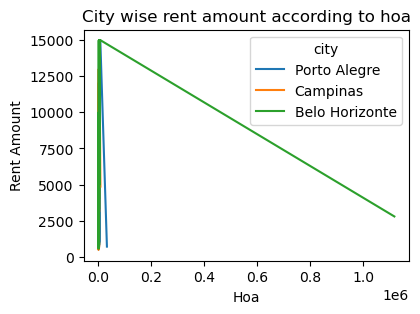

In [43]:
plt.figure(figsize=(4.2,3))
data1=data[(data['city'].isin(['Porto Alegre','Campinas','Belo Horizonte']))]
sb.lineplot(x=data1['hoa (R$)'],y=data1['rent amount (R$)'],hue=data1['city'])
plt.title('City wise rent amount according to hoa')
plt.xlabel('Hoa')
plt.ylabel('Rent Amount')
plt.show()

Observation:<br>
    IN Belo Horizonte hoa decreases with increase in rent amount

Observation:<br>
    Parking space increases with increase in rent amount

**How many parking spaces available in 3 City according to number of rooms?**

Text(0.5, 1.0, 'City wise parking spaces according to number of rooms')

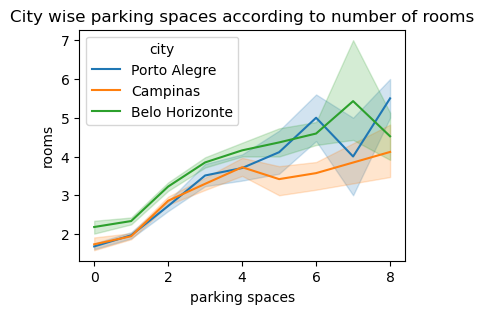

In [65]:
plt.figure(figsize=(4.2,3))
data1=data[(data['city'].isin(['Porto Alegre','Campinas','Belo Horizonte']))]
sb.lineplot(x=data1['parking spaces'],y=data1['rooms'],hue=data1['city'])
plt.title('City wise parking spaces according to number of rooms')
plt.xlabel('Parking spaces')
plt.ylabel('Rent Amount')
plt.show()

Observation:<br>
    Parking spaces increases with increase in room  ('Campinas')

# Interpretation

1)Sau paulo has 5900 vacant flats & Nearly 1000 homes in all other cities<br>
2)there are 2400 1bhk room & 3000 3bhk rooms are available for rent<br>
3)3500 flats have 1 parking spaces<br>
4)4000+ flats have 1 bathroom <br>
5)pets are accepted in 8000 & 2000 plus flats does not allow pets<br>
6)2500 flats are furnished & 8000 flats are unfurnished<br>
7)2400 flats has 0 floor<br>
8)Many Flats has area between 0 to 250<br>
9)house owner assoiation tax  data has is between 0 to 0.1<br>
10)1000 homes have rent 1500-2000<br>
11)2000 plus flats have property tax 0<br>
12)1000 plus flats have file insurance amount in range 25 to 30<br>
13)Rent Prices are high in Sao paulo<br>
14)3500 flats have 1 parking spaces<br>
15)we can get furnished home in all cities below 3000<br>
16)file insurance amount is in range of 0 to 95<br>
17)1 bathrooms are more in all cities<br>
18)Pets are allowed more in sao paulo city<br>
19)IN Campinas we can get 1bhk flat for cheap Price<br>
20)In Campinas  we get 2bhk flat for cheap Price<br>
21)In Belo Horizonte we get 3bhk flat for cheap Price<br>
22)rent amount increases with increase in number of rooms<br>
23)Rent Amount of flats Increase with increase in number of bathroom<br>
24)rent amount increases with increase in area of flat<br>
25)Rent Amount is low for unfurnished homes<br>
26)Rent amount is low for Flats which does not allow pets<br>
27)Rent amount is low for 0 & 1 parking spaces,3 to 5 parking spaces has almost same rent amount<br>
28)parking spaces increases with increase in number of rooms<br>
29)Property tax increases with increase in rent amount.in porto alegra and campinas. 
& Belo horizonte has same property tax for all rent amount.<br>
30)IN Belo Horizonte hoa decreases with increase in rent amount<br>

    


# Sugessions:

<b>For bachelors:</b><br>
    1.IN Campinas we can get 1bhk flat with 1 bathrooms & 1 parking spaces at low Price<br>
    2.we can get  furnished home below 3000 & unfurnished home below 2500  <br>
    3.pets allowed below price 2300 ,if pets not allowed price will be 2100<br>
 <br>

<b>For mid size family:</b><br>
    1.In Campinas  we get 2bhk flat with 1 to 2 parking spaces,1 to 2 bathrooms for low price<br>
    2.we can get Pets allowed home below 2300 & Pets not allowed home below 2100. <br>
    3.we can get furnished home below 3000 & unfurnished home below 2500 in Campinas<br>
<br>
<b>for Big family:</b><br>
    1.In Campinas lass &  Belo Horizonte we get 3bhk flat with 1 to 2 parking spaces<br> 
    & 2 bathroom for low price<br>
    2.Property tax is low in Belo Horizonte<br>
    3.we can get Pets allowed home below 4000 & Pets not allowed home below 3500. <br>


